In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.contrib.layers import flatten

import load_data
import create_layers

## Load images

In [2]:
IMAGES_DIR = "../roadsigns_photos"
TESTING_PCT = 25
VALIDATION_PCT = 8

img_lists = load_data.create_image_lists(IMAGES_DIR)
features, targets = load_data.load_features_and_targets(img_lists)

Looking for images in '30'
Looking for images in '50'
Looking for images in '60'
Looking for images in '70'
Looking for images in '80'


## Data vizualisation

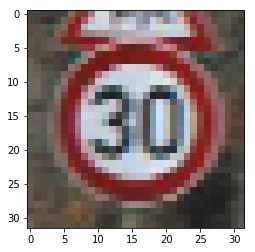

[1 0 0 0 0]


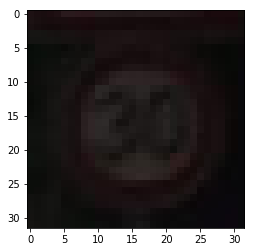

[1 0 0 0 0]


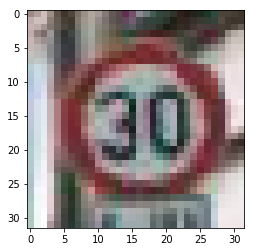

[1 0 0 0 0]


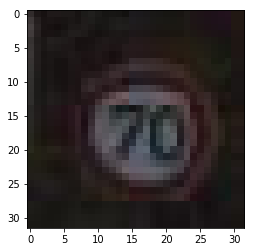

[0 0 0 1 0]


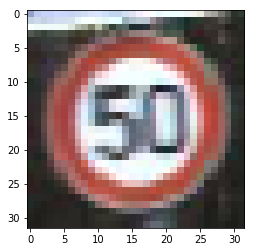

[0 1 0 0 0]


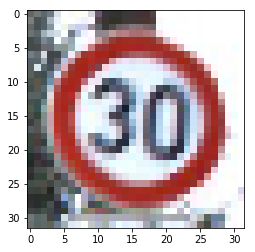

[1 0 0 0 0]


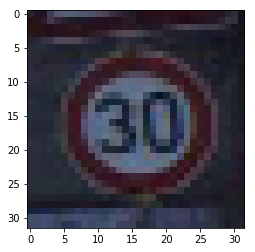

[1 0 0 0 0]


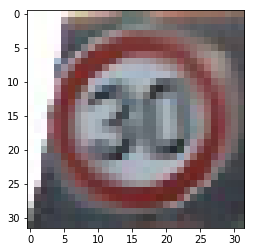

[1 0 0 0 0]


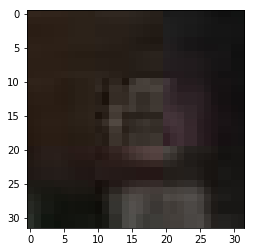

[0 0 0 0 1]


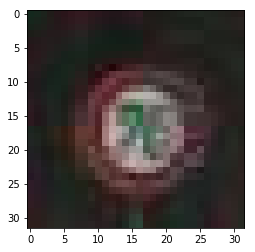

[0 0 0 1 0]


In [3]:
features_count = len(features) - 1

for i in range(0, 10):
    idx = np.random.randint(0, features_count)
    plt.imshow(features[idx])
    plt.show()
    print(targets[idx])

## Split features into testing and training sets

In [4]:
X_train, X_valid, y_train, y_valid = train_test_split(features, targets, test_size=0.1, random_state=42)

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_valid.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_valid.shape)

X_train.shape (5886, 32, 32, 3)
X_valid.shape (654, 32, 32, 3)
y_train.shape (5886, 5)
y_valid.shape (654, 5)


## Create convolutionnal layers

In [5]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3), name="features")
conv_dropout = tf.placeholder(tf.float32, (None), name="conv_dropout")
fc_dropout = tf.placeholder(tf.float32, (None), name="fc_dropout")

conv1 = create_layers.create_conv(x, 32, 3, conv_dropout)
conv2 = create_layers.create_conv(conv1, 64, 3, conv_dropout)
conv3 = create_layers.create_conv(conv2, 128, 3, conv_dropout)

## Create fully connected layers

In [6]:
classes_count = len(targets[0])
flat = flatten(conv3)

fc1 = create_layers.create_fc_layer(flat, 120, fc_dropout)
fc2 = create_layers.create_fc_layer(fc1, 84, fc_dropout)

fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, classes_count), stddev = 0.1))
fc3_b  = tf.Variable(tf.zeros(classes_count))
logits = tf.matmul(fc2, fc3_W) + fc3_b

softmax = tf.nn.softmax(logits, name="y_pred")

## Create loss operation

In [7]:
y = tf.placeholder(tf.float32, (None, classes_count), name="targets")

cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)

## Create accuracy operation

In [8]:
predicted_cls = tf.argmax(softmax, axis=1)
correct_prediction = tf.equal(predicted_cls, tf.argmax(y, axis=1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

## Create training operation

In [9]:
optimizer = tf.train.AdamOptimizer(learning_rate = 0.001)
training_operation = optimizer.minimize(loss_operation)

## Train the model

In [10]:
BATCH_SIZE = 500
MODEL_PATH = './speed-sign-recognizer-model/speed-sign-recognizer'
EPOCH_COUNT = 600

sess =  tf.Session()
sess.run(tf.global_variables_initializer())

saver = tf.train.Saver()

for epoch in range(1, EPOCH_COUNT):
    print("========= Epoch: %s/%s =========" % (epoch, EPOCH_COUNT))

    indexes = np.arange(len(X_train))
    np.random.shuffle(indexes)
    X_train = X_train[indexes]
    y_train = y_train[indexes]

    for b in range(0, len(X_train), BATCH_SIZE):
        batch = X_train[b:(b + BATCH_SIZE)]
        sess.run(training_operation, feed_dict={x: batch, y: y_train[b:(b + BATCH_SIZE)], conv_dropout: 0.85, fc_dropout: 0.65})

    if epoch % 2 == 0:
        accs = []
        for b in range(0, len(X_valid), BATCH_SIZE):
            accs.append(sess.run(accuracy_operation, feed_dict={x: X_valid[b:(b + BATCH_SIZE)], y: y_valid[b:(b + BATCH_SIZE)], conv_dropout: 1.0, fc_dropout: 1.0}))
        print("Validation accuracy:", np.mean(accs))

    saver.save(sess, MODEL_PATH)


========= Epoch: 1/600 =========
========= Epoch: 2/600 =========
Validation accuracy: 0.24287012
========= Epoch: 3/600 =========
========= Epoch: 4/600 =========
Validation accuracy: 0.25562337
========= Epoch: 5/600 =========
========= Epoch: 6/600 =========
Validation accuracy: 0.22737662
========= Epoch: 7/600 =========
========= Epoch: 8/600 =========
Validation accuracy: 0.21088311
========= Epoch: 9/600 =========
========= Epoch: 10/600 =========
Validation accuracy: 0.2108961
========= Epoch: 11/600 =========
========= Epoch: 12/600 =========
Validation accuracy: 0.2108961
========= Epoch: 13/600 =========
========= Epoch: 14/600 =========
Validation accuracy: 0.22014286
========= Epoch: 15/600 =========
========= Epoch: 16/600 =========
Validation accuracy: 0.22138962
========= Epoch: 17/600 =========
========= Epoch: 18/600 =========
Validation accuracy: 0.22863637
========= Epoch: 19/600 =========
========= Epoch: 20/600 =========
Validation accuracy: 0.23063636
========= E

========= Epoch: 166/600 =========
Validation accuracy: 0.96227276
========= Epoch: 167/600 =========
========= Epoch: 168/600 =========
Validation accuracy: 0.9655195
========= Epoch: 169/600 =========
========= Epoch: 170/600 =========
Validation accuracy: 0.97601295
========= Epoch: 171/600 =========
========= Epoch: 172/600 =========
Validation accuracy: 0.95602596
========= Epoch: 173/600 =========
========= Epoch: 174/600 =========
Validation accuracy: 0.96976626
========= Epoch: 175/600 =========
========= Epoch: 176/600 =========
Validation accuracy: 0.96976626
========= Epoch: 177/600 =========
========= Epoch: 178/600 =========
Validation accuracy: 0.96751946
========= Epoch: 179/600 =========
========= Epoch: 180/600 =========
Validation accuracy: 0.97601295
========= Epoch: 181/600 =========
========= Epoch: 182/600 =========
Validation accuracy: 0.9845065
========= Epoch: 183/600 =========
========= Epoch: 184/600 =========
Validation accuracy: 0.97476625
========= Epoch: 

KeyboardInterrupt: 